<a href="https://colab.research.google.com/github/tkoyama010/Colaboratory/blob/master/vtk_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install matplotlib-3d

First we install matplotlib-3d which is a experimental 3D axis for matplotlib.

In [0]:
!pip install git+https://github.com/tkoyama010/matplotlib-3d.git

  Cloning https://github.com/tkoyama010/matplotlib-3d.git to /tmp/pip-req-build-01tf8fm0
  Running command git clone -q https://github.com/tkoyama010/matplotlib-3d.git /tmp/pip-req-build-01tf8fm0
  Created wheel for mpl3d: filename=mpl3d-0.0.1-cp36-none-any.whl size=11671 sha256=a0d6457cb1ea5c0c8cdae0e58f2226f50c455769a73f2f0825c278121de275d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-jnlyfny1/wheels/9a/77/29/00b16f4bd59c14f8d0e196408fb58a9d5810318b69f0686c26
Successfully built mpl3d


Next, we install [meshio](https://github.com/nschloe/meshio) which is a library for input/output for many mesh formats.

In [0]:
!pip install meshio

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
!wget https://people.sc.fsu.edu/~jburkardt/data/vtk/rbc_001.vtk

--2020-03-31 12:48:49--  https://people.sc.fsu.edu/~jburkardt/data/vtk/rbc_001.vtk
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.16.100
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.16.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33167 (32K) [text/plain]
Saving to: ‘rbc_001.vtk’

rbc_001.vtk         100%[===================>]  32.39K  --.-KB/s    in 0.06s   

2020-03-31 12:48:49 (578 KB/s) - ‘rbc_001.vtk’ saved [33167/33167]



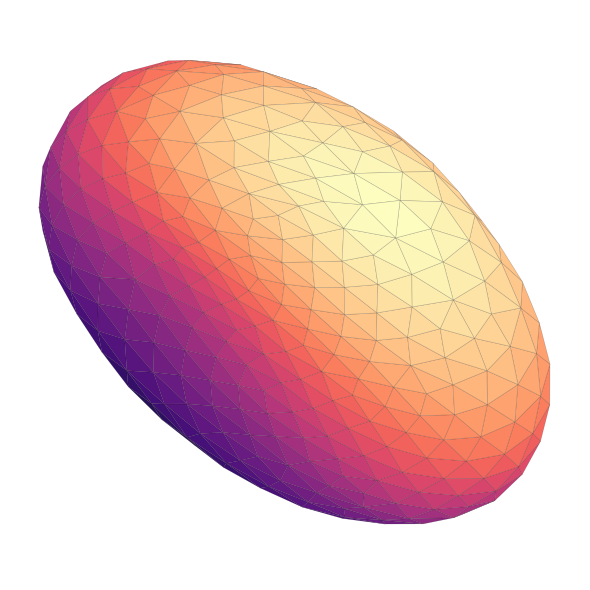

In [39]:
# -----------------------------------------------------------------------------
# Copyright (c) 2020 Nicolas P. Rougier, Tetsuo. All rights reserved.
# Distributed under the (new) BSD License.
# -----------------------------------------------------------------------------
import numpy as np
from mpl3d import glm
from mpl3d.mesh import Mesh
from mpl3d.camera import Camera
import meshio
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0, 0, 1, 1], xlim=[-1, +1], ylim=[-1, +1], aspect=1)
ax.axis("off")

camera = Camera("ortho", theta=45.0, phi=45.0, scale=2)
mesh = meshio.read("rbc_001.vtk")
vertices = mesh.points
faces = mesh.cells[0].data
vertices = glm.fit_unit_cube(vertices)
mesh = Mesh(
    ax,
    camera.transform,
    vertices,
    faces,
    cmap=plt.get_cmap("magma"),
    edgecolors=(0, 0, 0, 0.25),
)
camera.connect(ax, mesh.update)
plt.savefig("rbc_001.png", dpi=600)
plt.show()
